<a href="https://colab.research.google.com/github/L4ncelot1024/Learn_Deep_Learning_Le_Wagon/blob/main/Day1/04_Fraud_Detection_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection

In this exercise, we work on tabular data of credit card history available on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). The aim is to detect a mere 492 fraudulent transactions from 284,807 transactions in total.

One particularity of this dataset is it's proportion of positive labels which is quite low, we say it's a highly imbalanced dataset since the number of examples in one class greatly outnumbers the examples. We'll see how to deal with such a dataset.

In [1]:
%tensorflow_version 2.x

In [2]:
# This is to fix bugs seaborn has with new matplotlib version
!pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1MB 21.0MB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# This will fix the figsize for the whole notebook
mpl.rcParams['figure.figsize'] = (15, 10)

## Data

### Downloading the data

In [5]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Inspecting the data

In [7]:
# TODO: inspect the shape, format, basic statistics and proportion of positive sample of the data
# (both for input and output)
print(raw_df.shape)
fraud_fraction = 100 * raw_df.Class.sum() / len(raw_df)
print(f'{fraud_fraction} % of fraud in the dataset')
raw_df.describe()

(284807, 31)
0.1727485630620034 % of fraud in the dataset


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<details>
<summary markdown='span'>View solution
</summary>

```python
print(raw_df.shape)
fraud_fraction = 100 * raw_df.Class.sum() / len(raw_df)
print(f'{fraud_fraction} % of fraud in the dataset')
raw.describe()
```

### Cleaning the data

In [10]:
#questio : why epsilon ?
# TODO: Inspect and clean column by column:
cleaned_df = raw_df.copy()
 
# You don't want the `Time` column.
cleaned_df.pop('Time')
 
# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_df['Amount'] = np.log(cleaned_df['Amount'] + eps)

<details>
<summary markdown='span'>View solution
</summary>

```python
# hints:
# - do you need the time column?
# - what do you think about the range of the column Amount?

cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_df['Amount'] = np.log(cleaned_df['Amount'] + eps)
```

In [11]:
#questions a quoi sert values
# Here, we split the data in (train, val, test) with (0.64, 0.16, 0.20),
# i.e. test is 20% of all, train is 80% of the rest and val is 20% of the rest
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

train_labels = train_df.pop('Class').values
val_labels = val_df.pop('Class').values
test_labels = test_df.pop('Class').values

train_features = train_df.values
val_features = val_df.values
test_features = test_df.values

In [12]:
# TODO: Fit a standard scaler to your training data and apply it to the test, val data
# to transform you train data in 0-mean and 1-std
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
 
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)
 
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)
 
 
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)
 
print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


<details>
<summary markdown='span'>Hints
</summary>
Use the StandardScaler from sklearn to be more efficient and robust to outliers. Fit on the train data and apply train and test data.
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
# hints:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)
```

### Checking features distributions

Next compare the distributions of the positive and negative examples over a few features. Good questions to ask yourself at this point are:

Do these distributions make sense?

==> Yes. You've normalized the input and these are mostly concentrated in the +/- 2 range.

Can you see the difference between the ditributions?

==> Yes the positive examples contain a much higher rate of extreme values.

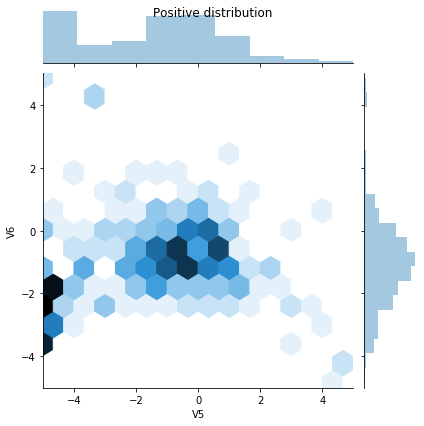

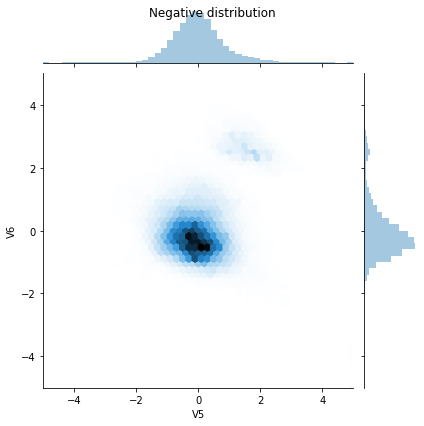

In [ ]:
bool_train_labels = (train_labels != 0)

# We recreate a dataframe to plot the processed features and not the raw one
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))

plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

#Modeling

### Defining Model & Metrics

Notes about metrics:

- False negatives and false positives are samples that were incorrectly classified

- True negatives and true positives are samples that were correctly classified

- Accuracy is the percentage of examples correctly classified:
$\frac{true \, positive}{n_{samples}}$

- Precision is the percentage of predicted positives that were correctly classified
$\frac{true \, positive}{true \, positive + false \, positive}$

- Recall is the percentage of actual positives that were correctly classified
$\frac{true \, positive}{true \, positive + false \, negative}$

- AUC refers to the Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC). This metric is equal to the probability that a classifier will rank a random positive sample higher than than a random negative sample.

In [ ]:
# TODO: build a function build_model() to build a relevant model for this task
# Here we ask you to pass to your model compiler a list of relevant metrics
# to evaluate classification task, don't hesitate to include many of them,
# it will help you to evaluate your model on this imbalanced dataset
# check keras.metrics




<details>
<summary markdown='span'>View solution
</summary>

```python

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


def build_model(metrics = METRICS):
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

```

In [ ]:
model = build_model()
model.summary()

In [ ]:
# TODO: a good practice, after printing the summary of your model, is to
# predict with your model before training it to make
# sure it runs through and the output is correctly formatted
# Predict on 10 input sample to check that

<details>
<summary markdown='span'>View solution
</summary>

```python
model.predict(train_features[:10])
```

What do you think about the intial prediction done by the models? 

Are they similar to what you expect?

Since we have a highly imbalanced dataset, we would rather see intial predictions very low, so we can change this before training our model so it's already clother to the truth and will converge faster

see here for a reference of this trick, part "init well": [A Recipe for Training Neural Networks: "init well"](http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines)

In [ ]:
# TODO: Implement the suggested trick, you just need to set the initial bias
# and check on initial predictions it does what you expect


<details>
<summary markdown='span'>Hints
</summary>
To set the bias you can use tf.keras.initializers.Constant
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
pos = bool_train_labels.sum()
neg = (~bool_train_labels).sum()

initial_bias = np.log([pos/neg])

def build_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

print(initial_bias)
model = build_model(output_bias = initial_bias)
model.predict(train_features[:10])
```

What do you observe? Is it closer to the expected value of $\frac{pos}{total} = 0.0018$ ?

### Training: Comparison

In [ ]:
# Before training the model, we save the initial weights so we'll load them
# for any training we do to compare the results

# now commented so we don't save them again
#initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
print(initial_weights)
#model.save_weights(initial_weights)

/tmp/tmpim9qcvog/initial_weights


In [ ]:
# TODO: train your model with and without the biais trick and compare the results
# (make sure the other weights are the same in your 2 experiments so it's faire to compare the results)
# you can train for only 20 epochs at first to make it shorter and compare the two methods

# NB: here you'll use a larger batch_size since you want to make sure there is
# at least a few positive samples in each batch (try for example batch_size=2048)


<details>
<summary markdown='span'>Hints
</summary>
Don't forget to load your weights 
</details>

<details>
<summary markdown='span'>Hints
</summary>
Don't forget to load your weights 
</details>

<details>
<summary markdown='span'>Hints
</summary>
you can use early stopping 
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
model.load_weights(initial_weights)
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


# ### CASE 1: without the biais

model = build_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

# ### CASE 2: with the biais (it's already part of your saved weights)

model = build_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=1)

In [ ]:
# TODO: plot the evolution of the errors, we particularly care about the mae and mse


<details>
<summary markdown='span'>View solution
</summary>

```python

zero_bias_history_df = pd.DataFrame(zero_bias_history.history).reset_index().rename(columns={'index': 'epochs'})
zero_bias_history_df.tail()

careful_bias_history_df = pd.DataFrame(careful_bias_history.history).reset_index().rename(columns={'index': 'epochs'})
careful_bias_history_df.tail()

metrics_to_plot = ['loss', 'auc', 'precision', 'recall']
fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(14, 20))

for i, metric in enumerate(metrics_to_plot):
  ax = axes[i]
  # plot zero bias
  zero_bias_history_df.plot('epochs', f'{metric}', color='g', label='train zero bias', ax=ax)
  zero_bias_history_df.plot('epochs', f'val_{metric}', color='r', label='validation zero bias', ax=ax)
  # plot smart bias
  careful_bias_history_df.plot('epochs', f'{metric}', color='g', label='train caregful bias', ax=ax, linestyle='--')
  careful_bias_history_df.plot('epochs', f'val_{metric}', color='r', label='validation caregful bias', ax=ax, linestyle='--')
  ax.set_ylabel(metric)
plt.legend()
plt.show()
```

### Training: baseline

In [ ]:
# TODO: train your model for 100 steps to set a baseline

<details>
<summary markdown='span'>View solution
</summary>

```python
model = build_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))
```

In [ ]:
# TODO: plot the evolution of the errors




<details>
<summary markdown='span'>View solution
</summary>

```python

baseline_history_df = pd.DataFrame(baseline_history.history).reset_index().rename(columns={'index': 'epochs'})
baseline_history_df.tail()

metrics_to_plot = ['loss', 'auc', 'precision', 'recall']
fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(14, 20))

for i, metric in enumerate(metrics_to_plot):
  ax = axes[i]
  baseline_history_df.plot('epochs', f'{metric}', color='g', label='train zero bias', ax=ax)
  baseline_history_df.plot('epochs', f'val_{metric}', color='r', label='validation zero bias', ax=ax)
  ax.set_ylabel(metric)
plt.legend()
plt.show()
```

In [ ]:
# TODO: evaluate your model on the test data (compute relevant metrics)

<details>
<summary markdown='span'>View solution
</summary>

```python
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()
```

In [ ]:
# TODO: plot the confusion matrix, you can use a heatmap as a good way of displaying it
# see here https://seaborn.pydata.org/generated/seaborn.heatmap.html

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

<details>
<summary markdown='span'>View solution
</summary>

```python
plot_cm(test_labels, test_predictions_baseline)
```

Another relevant curve is the [ROC](https://developers.google.com/machine-learning/glossary#ROC) (Receiver operating characteristic) curve, it's the curve of true positive rate vs. false positive rate at different classification thresholds.

The auc metric is the area under the curve.

In [ ]:
# TODO plot the roc curve
# see scikit ref here https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

<details>
<summary markdown='span'>View solution
</summary>

```python
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color='g',)
plot_roc("Test Baseline", test_labels, test_predictions_baseline, linestyle='--', color='r')
plt.legend(loc='lower right')
plt.show()
```

Comment the curve:
- Compare precision and recall values.
- Think about which error your care the most: for instance here, a false negative (a fraudulent transaction is missed) may have a financial cost, while a false positive (a transaction is incorrectly flagged as fraudulent) may decrease user happiness

### Training: class weights

If there is a class which you want to emphasize in your training, you can heavily weight it when computing the loss. These will cause the model to "pay more attention" to examples from an under-represented class.

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
neg = (raw_df.Class == 0).sum()
pos = raw_df.Class.sum()
total = len(raw_df)

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [ ]:
# TODO: train your model with the class weights

<details>
<summary markdown='span'>Hints
</summary>
There is a nice arguments in the keras `.fit()` method called `class_weight`
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
weighted_model = build_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 
```

In [ ]:
# TODO: plot the evolution of the errorsn and evaluate your model on the test set

<details>
<summary markdown='span'>View solution
</summary>

```python
metrics_to_plot = ['loss', 'auc', 'precision', 'recall']

weighted_history_df = pd.DataFrame(weighted_history.history).reset_index().rename(columns={'index': 'epochs'})

fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(14, 20))

for i, metric in enumerate(metrics_to_plot):
  ax = axes[i]
  baseline_history_df.plot('epochs', f'{metric}', color='g', label='train baseline', ax=ax)
  baseline_history_df.plot('epochs', f'val_{metric}', color='r', label='validation baseline', ax=ax)

  weighted_history_df.plot('epochs', f'{metric}', color='g', label='train weighted', ax=ax, linestyle='--')
  weighted_history_df.plot('epochs', f'val_{metric}', color='r', label='validation weighted', ax=ax, linestyle='--')
  ax.set_ylabel(metric)
plt.legend()
plt.show()

# Evaluation on the test set
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_roc("Train Baseline", train_labels, train_predictions_baseline, color='g')
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color='r')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color='g', linestyle='--')
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color='r', linestyle='--')


plt.legend(loc='lower right')
plt.show()
```

Comment the curves and metrics:
- How do the weights impact the different metrics?
- Is this new model more relevant for your task?

### Training: Oversampling

Another popular approach to deal with highly imbalanced data is to modify the ratio of positive samples the model is seeing during the training phase. There are different ways of doing this, we can **oversample** the minority class or **undersample** the majority class


In [ ]:
# First we separate the pos and neg sample

pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
# TODO: use numpy random sampling method with replacement to oversample the positive classes

<details>
<summary markdown='span'>Hints
</summary>
check the method np.random.choice
</details>

<details>
<summary markdown='span'>Hints
</summary>
Oversample to a positive ratio of 30% (if enough time you can try with other rates)
</details>

<details>
<summary markdown='span'>Hints
</summary>
Then use np.concatenate to reassemble your dataset and shuffle it
</details>

<details>
<summary markdown='span'>Hints
</summary>
Don't forget to update your initial bias and you change the number of samples so it might take longer to run an epoch
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
ids = np.arange(len(pos_features))
oversampled_indices = np.random.choice(ids, int(0.3 * len(neg_features)), replace=True)

res_pos_features = pos_features[oversampled_indices]
res_pos_labels = pos_labels[oversampled_indices]

oversampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
oversampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(oversampled_labels))
np.random.shuffle(order)

oversampled_features = oversampled_features[order]
oversampled_labels = oversampled_labels[order]

oversampled_features.shape

In [ ]:
# TODO: train your model for 100 epochs 

<details>
<summary markdown='span'>View solution
</summary>

```python
oversampled_model = build_model()
oversampled_model.load_weights(initial_weights)

# Update the init biais
pos = bool_train_labels.sum()
neg = (~bool_train_labels).sum()

oversampled_initial_bias = np.log([oversampled_labels.sum()/(oversampled_labels == 0).sum()])

output_layer = oversampled_model.layers[-1] 
output_layer.bias.assign(oversampled_initial_bias)

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

oversampled_history = oversampled_model.fit(
    oversampled_features,
    oversampled_labels,
    epochs=100,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))
```

In [ ]:
# TODO: plot the evolution of the errors and compare it with previous methods

<details>
<summary markdown='span'>View solution
</summary>

```python
metrics_to_plot = ['loss', 'auc', 'precision', 'recall']

oversampled_history_df = pd.DataFrame(oversampled_history.history).reset_index().rename(columns={'index': 'epochs'})

fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(14, 20))

for i, metric in enumerate(metrics_to_plot):
  ax = axes[i]
  baseline_history_df.plot('epochs', f'{metric}', color='g', label='train baseline', ax=ax)
  baseline_history_df.plot('epochs', f'val_{metric}', color='r', label='validation baseline', ax=ax)

  weighted_history_df.plot('epochs', f'{metric}', color='g', label='train weighted', ax=ax, linestyle='--')
  weighted_history_df.plot('epochs', f'val_{metric}', color='r', label='validation weighted', ax=ax, linestyle='--')

  oversampled_history_df.plot('epochs', f'{metric}', color='g', label='train weighted', ax=ax, linestyle='dotted')
  oversampled_history_df.plot('epochs', f'val_{metric}', color='r', label='validation weighted', ax=ax, linestyle='dotted')
  ax.set_ylabel(metric)
plt.legend()
plt.show()

# Evaluate on test data and plot the ROC curve and compare it with previous methods

train_predictions_oversampled = oversampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_oversampled = oversampled_model.predict(test_features, batch_size=BATCH_SIZE)

oversampled_results = oversampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(oversampled_model.metrics_names, oversampled_results):
  print(name, ': ', value)
print()


plot_roc("Train Baseline", train_labels, train_predictions_baseline, color='g')
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color='r')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color='g', linestyle='--')
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color='r', linestyle='--')

plot_roc("Train Oversampled", train_labels, train_predictions_oversampled,  color='g', linestyle='dotted')
plot_roc("Test Oversampled", test_labels, test_predictions_oversampled,  color='r', linestyle='dotted')
plt.legend(loc='lower right')
```

Comment your results. You can also update the oversampling ratio and see how it affects your test metrics.

### Training: Undersampling

Check out the effect of the undersampling strategy